In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
commit_df = pd.read_pickle("commits.pkl")

In [3]:
# commits% by top player

In [4]:
commits = commit_df
result = {}
for year in range(2010, 2017):
    subset = commits[commits.committed_datetime.map(lambda t: t.year) == year]
    committers = subset.committer_name.value_counts()[:60].index
    percentage = subset[subset.committer_name.isin(committers)].shape[0] * 1.0 / subset.shape[0]
    result[year] = percentage

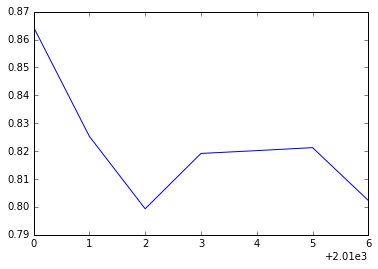

In [5]:
plt.figure(facecolor="white")
pd.Series(result).plot()

In [6]:
# commits

In [6]:
commits = commit_df
result = {}
for year in range(2010, 2017):
    subset = commits[commits.committed_datetime.map(lambda t: t.year) == year]
    committers = subset.committer_name.value_counts()[:60].index
    arr = []
    for committer in committers:
        arr.append(subset[subset.committer_name == committer].shape[0])
    result[year] = arr

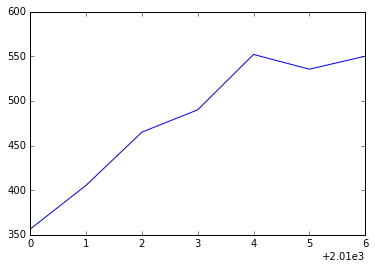

In [7]:
plt.figure(facecolor="white")
pd.DataFrame(result).median().plot()

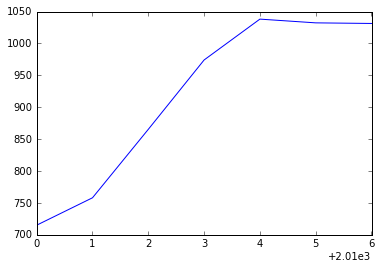

In [8]:
plt.figure(facecolor="white")
pd.DataFrame(result).mean().plot()

David S. Miller


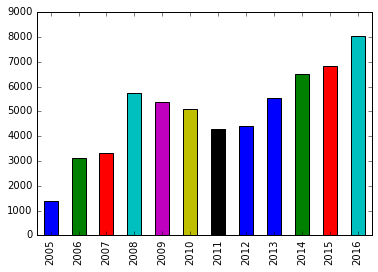

Greg Kroah-Hartman


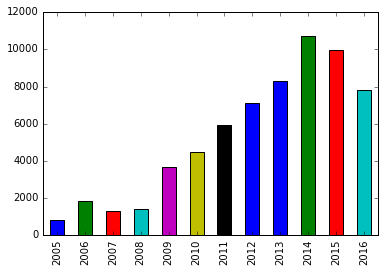

Linus Torvalds


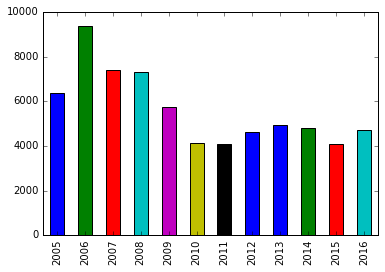

Mauro Carvalho Chehab


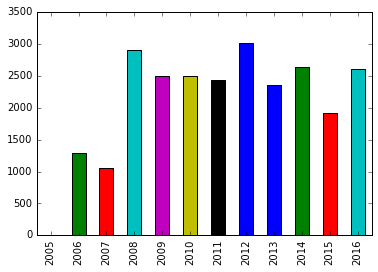

Mark Brown


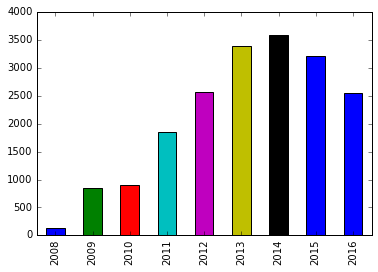

Ingo Molnar


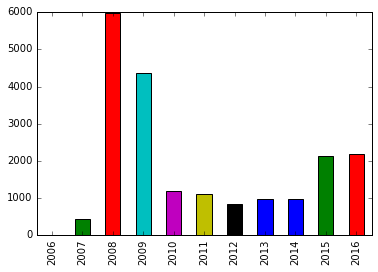

Alex Deucher


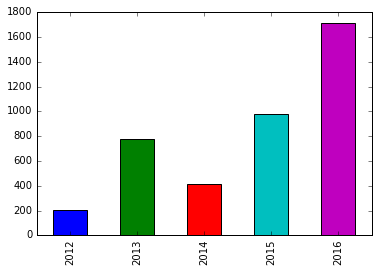

Doug Ledford


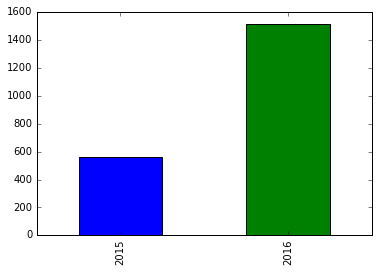

Arnaldo Carvalho de Melo


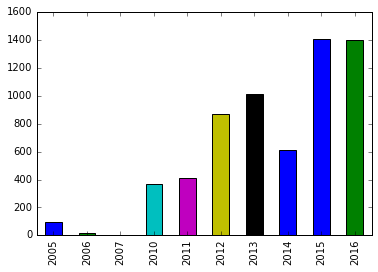

Kalle Valo


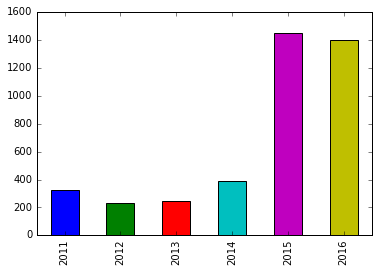

Rafael J. Wysocki


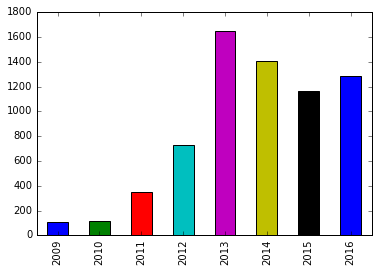

Linus Walleij


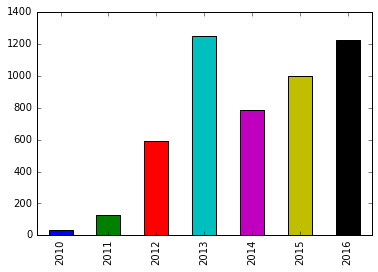

Daniel Vetter


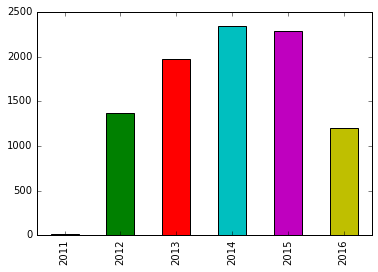

Martin K. Petersen


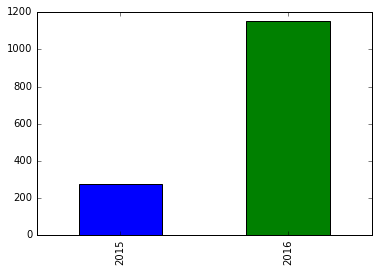

Michael Ellerman


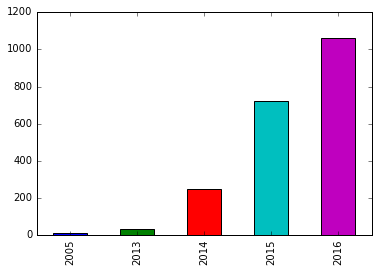

Chris Wilson


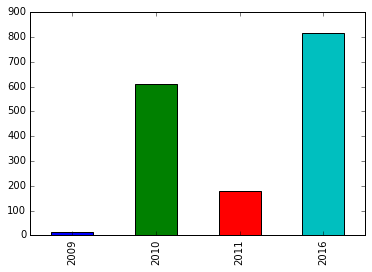

Herbert Xu


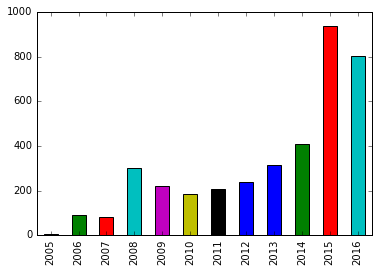

Jonathan Cameron


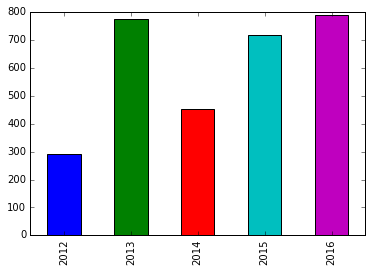

Jens Axboe


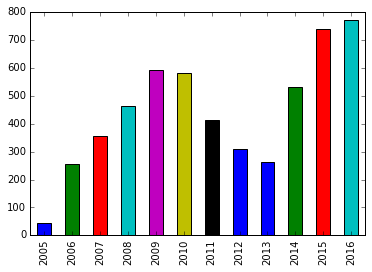

Bjorn Helgaas


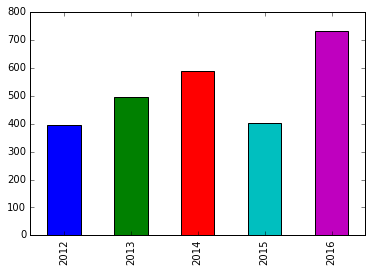

Ralf Baechle


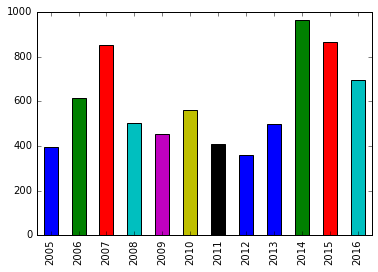

Thomas Gleixner


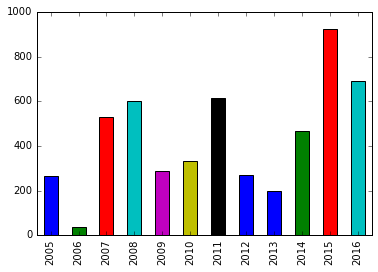

Jeff Kirsher


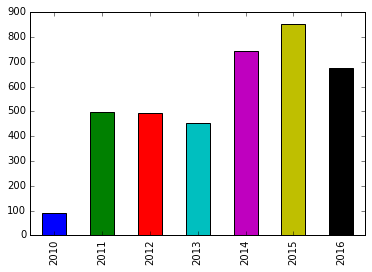

Ulf Hansson


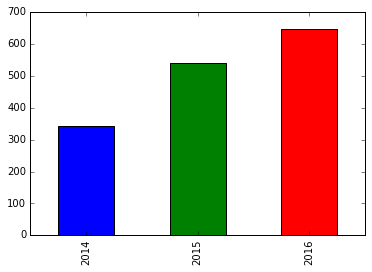

Felipe Balbi


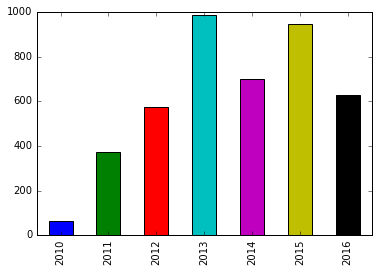

Vinod Koul


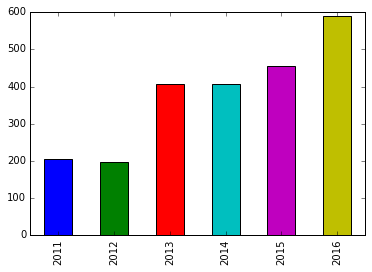

Stephen Boyd


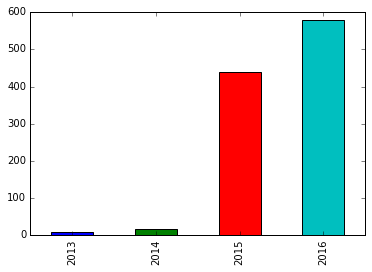

Simon Horman


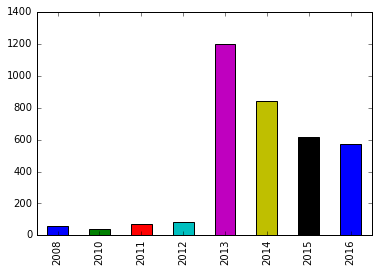

Takashi Iwai


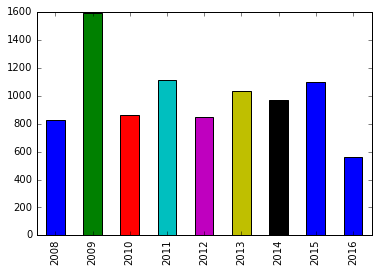

Tony Lindgren


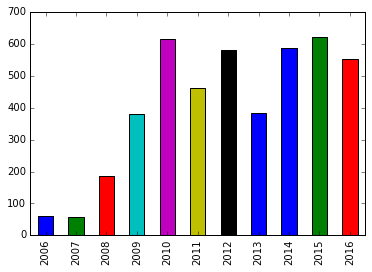

Al Viro


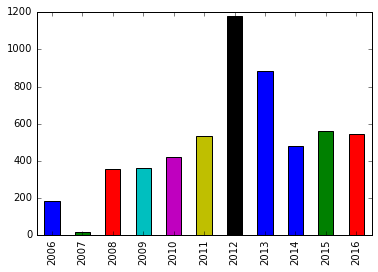

Arnd Bergmann


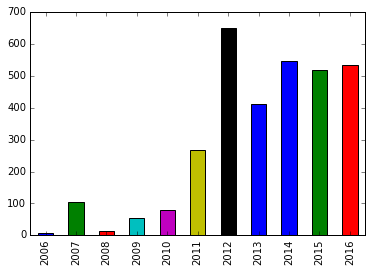

Jani Nikula


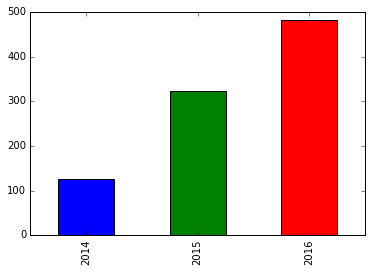

Dave Airlie


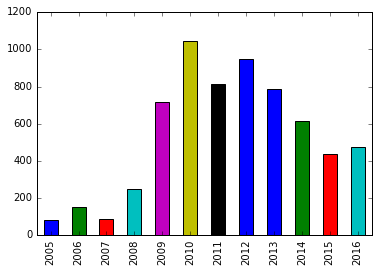

Dave Chinner


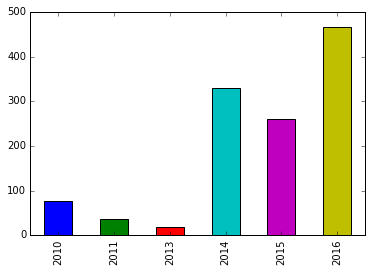

Thierry Reding


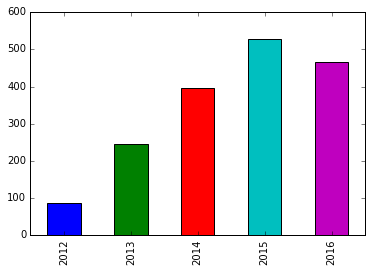

Paolo Bonzini


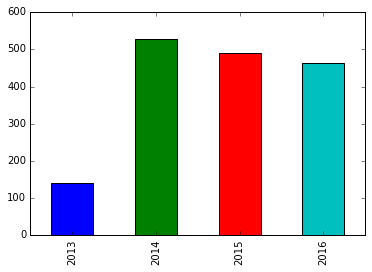

Ben Skeggs


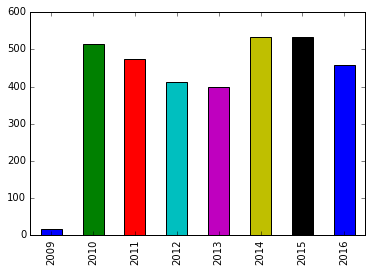

Shawn Guo


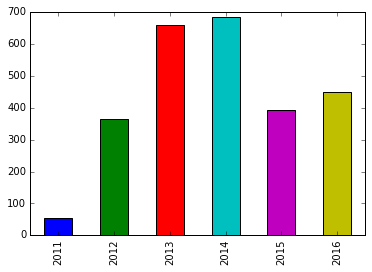

David Sterba


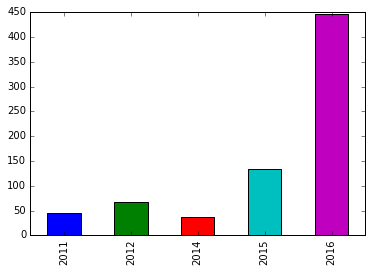

Pablo Neira Ayuso


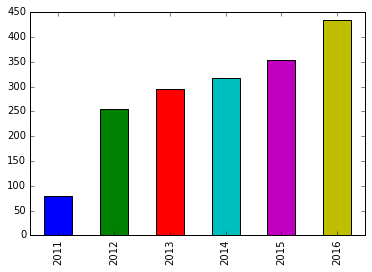

Wolfram Sang


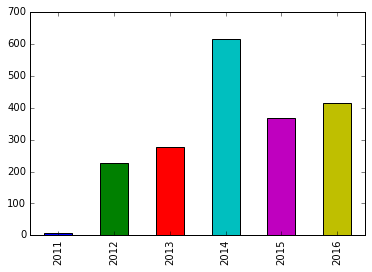

Martin Schwidefsky


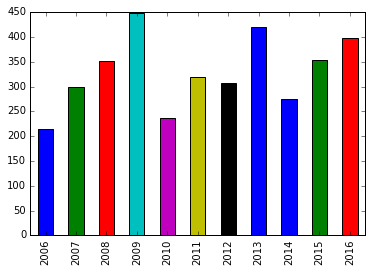

Will Deacon


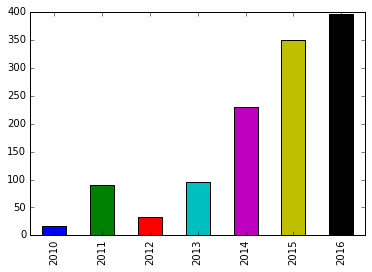

Olof Johansson


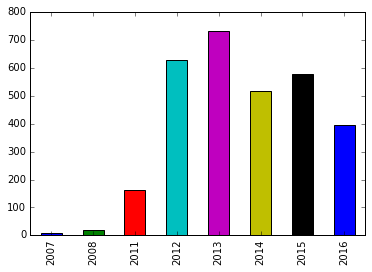

Maxime Ripard


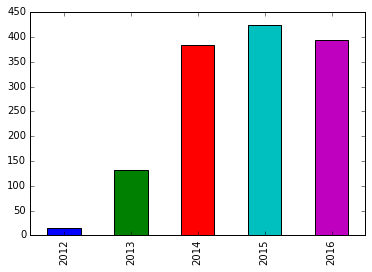

Jaegeuk Kim


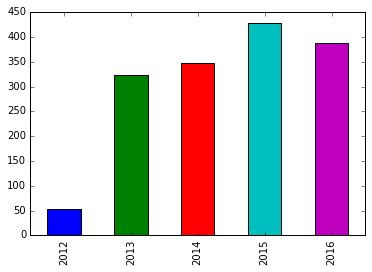

Lee Jones


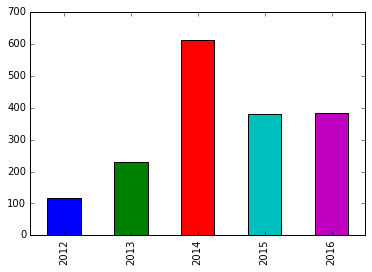

Ville Syrjälä


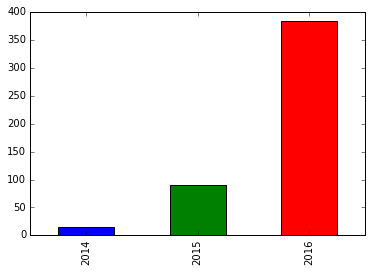

Johannes Berg


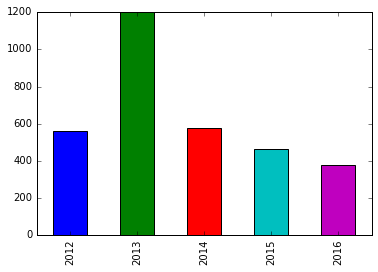

Jonathan Corbet


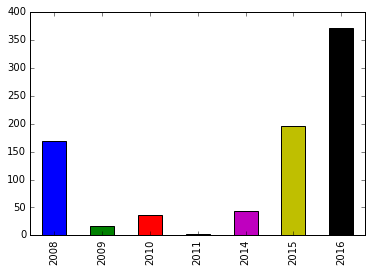

Alexandre Belloni


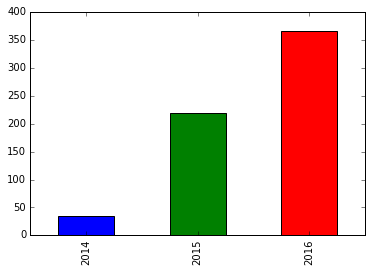

Jiri Kosina


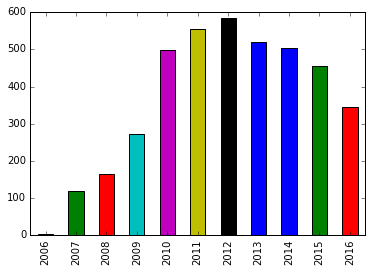

Dmitry Torokhov


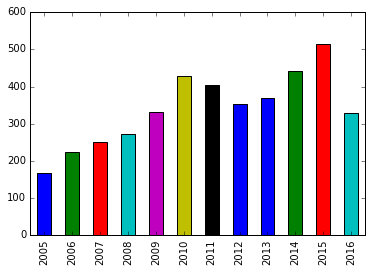

Tejun Heo


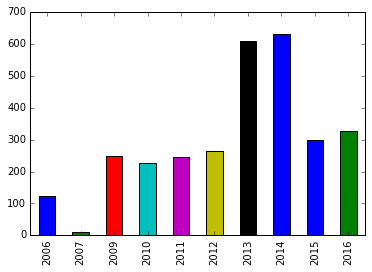

Heiko Stuebner


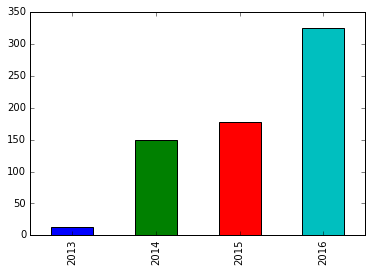

Krzysztof Kozlowski


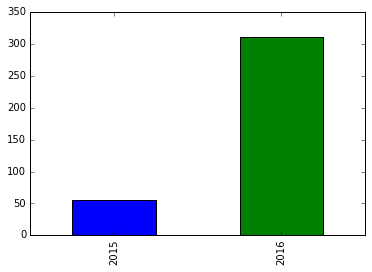

Tvrtko Ursulin


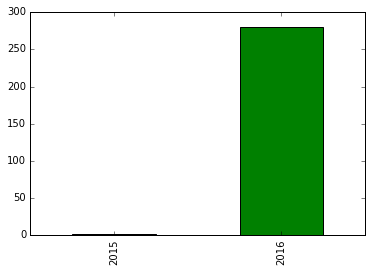

David Howells


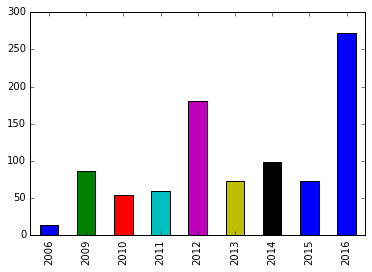

Boris Brezillon


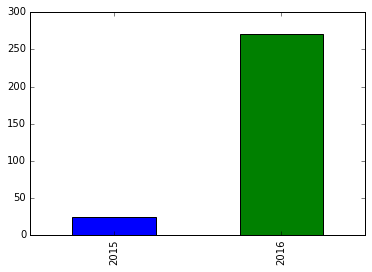

In [9]:
subset = commits[commits.committed_datetime.map(lambda t: t.year) == year]
committers = subset.committer_name.value_counts()[:60].index
for committer in committers:
    selected = commits[(commits.committer_name == committer) & (commits.committed_datetime < "20170101")]
    print committer
    selected.committed_datetime.map(lambda t: t.year).value_counts().sort_index().plot("bar")
    plt.show()

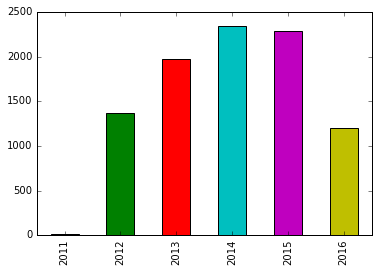

In [6]:
plt.figure(facecolor="w")
commits[(commits.committer_name == "Daniel Vetter") & (commits.committed_datetime < "20170101")].committed_datetime.map(lambda t: t.year).value_counts().sort_index().plot("bar")

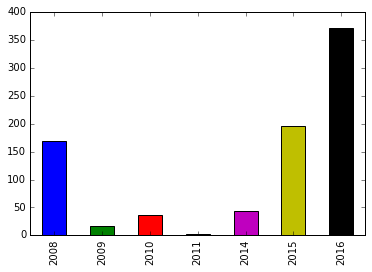

In [7]:
plt.figure(facecolor="w")
commits[(commits.committer_name == "Jonathan Corbet") & (commits.committed_datetime < "20170101")].committed_datetime.map(lambda t: t.year).value_counts().sort_index().plot("bar")

In [ ]:
# commits with no tags

In [10]:
commits = commit_df
result = {}
for year in range(2010, 2017):
    subset = commits[commits.committed_datetime.map(lambda t: t.year) == year]
    committers = subset.committer_name.value_counts()[:60].index
    arr = []
    for committer in committers:
        selected = subset[subset.committer_name == committer]
        no_tag = selected[selected.message.map(lambda m:  not ("Acked-by" in m or "Reviewed-by" in m or "Tested-by" in m))]
        arr.append(no_tag.shape[0])
    result[year] = arr

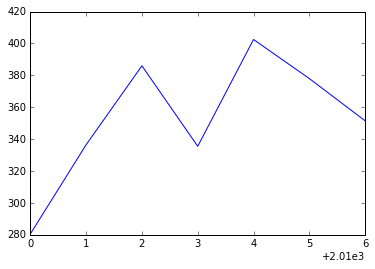

In [13]:
plt.figure(facecolor="white")
pd.DataFrame(result).median().plot()

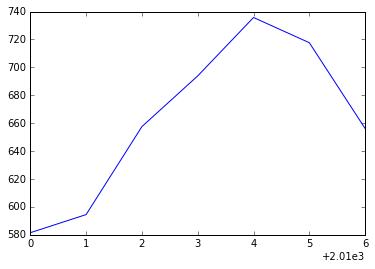

In [14]:
plt.figure(facecolor="white")
pd.DataFrame(result).mean().plot()

In [24]:
# different authors

In [3]:
commits = commit_df
result = {}
for year in range(2010, 2017):
    subset = commits[commits.committed_datetime.map(lambda t: t.year) == year]
    committers = subset.committer_name.value_counts()[:60].index
    arr = []
    for committer in committers:
        arr.append(len(set(subset[subset.committer_name == committer].author_name)))
    result[year] = arr

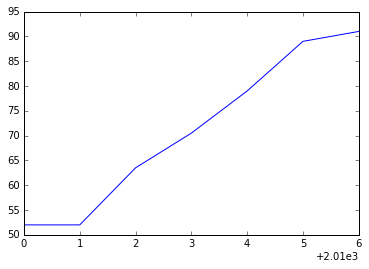

In [4]:
plt.figure(facecolor="white")
pd.DataFrame(result).median().plot()

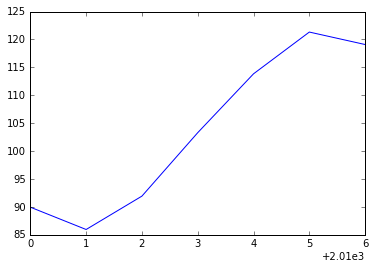

In [5]:
plt.figure(facecolor="white")
pd.DataFrame(result).mean().plot()